# CNN Project
We'll be using the CIFAR-10 dataset, which is very famous dataset for image recognition!

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 10000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.



![img.png.jpg](attachment:img.png.jpg)

In [6]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

--2019-06-21 17:40:29--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  62.1MB/s    in 2.6s    

2019-06-21 17:40:31 (62.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [10]:
!tar xvzf cifar-10-python.tar.gz 

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [11]:
!ls

cifar-10-batches-py  cifar-10-data  cifar-10-python.tar.gz  sample_data


## Data  Processing 

** Download the data for CIFAR from here: https://www.cs.toronto.edu/~kriz/cifar.html **

*Specifically the CIFAR-10 python version link: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz *

In [0]:
data_dir='cifar-10-batches-py/'   # Data directory where all data_batch the files contain
files = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

In [0]:
# Unpickle function is provided with the data
def unpickle(file):                                    
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [0]:
all_data=list(range(0,7))


In [0]:
for i,direc in zip(all_data,files):
    all_data[i] = unpickle(data_dir+direc)

In [0]:
data_meta = all_data[0]
data_1 = all_data[1]
data_2 = all_data[2]
data_3 = all_data[3]
data_4 = all_data[4]
data_5 = all_data[5]
test_batch = all_data[6]

In [17]:
# Total Labels Present in the Data (n =10)
tag = data_meta[b'label_names']
print(tag)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [18]:
data_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [19]:
''' 

The images are stored in row major order
As all the images are Colour Images RGB 
Each channel of the image is stored one after another for example:
    In row 1 first 32*32(1024) values represent the red channel and the further 32*32(1024) values represent green channel and then 32*32(1024) values represent blue
    We can interpret it as :
   [img 1]      row 1        0-1023(R channel) 1024-2047(G channel) 2048 -3071(Blue channel)
   [img 1]      row 2        0-1023(R channel) 1024-2047(G channel) 2048 -3071(Blue channel)
   ...
   ...
   ...
   [img 10000 ] row 100000   0-1023(R channel) 1024-2047(G channel) 2048 -3071(Blue channel)
   
   
'''

# Size of the data :
data_1[b'data'].shape

(10000, 3072)

In [20]:
data_1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
img = data_1[b'data']
img = img.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")  # reshape(total images, no of channel, height , width )

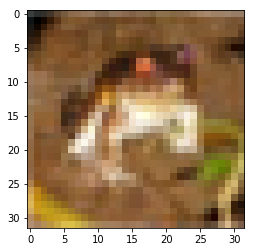

In [23]:
plt.imshow(img[0])

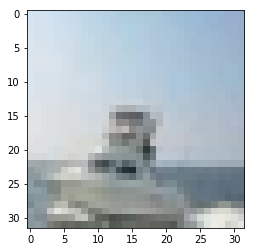

In [24]:
plt.imshow(img[100])

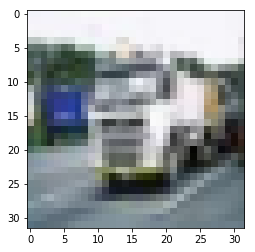

In [25]:
plt.imshow(img[1000])

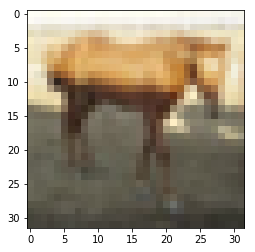

In [26]:
plt.imshow(img[2000])

In [0]:
def one_hot_encode(vec, vals=10):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [0]:
class DataSet():
    def __init__(self):
        self.i = 0
        self.all_train_batches = [data_1,data_2,data_3,data_4,data_5]  # all the train data batches
        self.test_batch = [test_batch]  # test data batches
        # Training Data
        self.train_images = None
        self.train_labels = None
        # Test data
        self.test_images = None
        self.test_labels = None
        
    def set_data(self):
            
            
        self.train_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.train_images)
         # Reshapes and normalizes train images
        self.train_images = self.train_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes 
        self.train_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        # Reshapes and normalizes test images
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        # One hot Encodes 
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)
        return self.train_images,self.train_labels,self.test_images,self.test_labels

In [0]:
ds = DataSet()

X_train , y_train, X_test, y_test = ds.set_data()

## Creating the CNN model

Building the CNN using the Keras API which is in built in the Tensorflow

In [0]:
# Dependencies 
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dropout ,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [0]:
model =  Sequential()

In [32]:
model.add(Conv2D(32, (3, 3), padding='same',activation = "relu",input_shape=(32,32,3)))
model.add(BatchNormalization())

W0621 17:41:29.728338 140076955420544 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.add(Conv2D(32, (3, 3), padding='same',activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))         

In [0]:
model.add(Conv2D(64, (3, 3), padding='same',activation = "relu"))
model.add(BatchNormalization())

In [0]:
model.add(Conv2D(64, (3, 3), padding='same',activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Dropout(0.4))

In [0]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))

In [0]:
model.add(Dense(10,activation = "softmax"))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [0]:
opt = Adam(lr=0.001)  #Optimizer


In [0]:
model.compile(opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train,y_train, batch_size=1000,epochs=100,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 216us/sample - loss: 2.3383 - acc: 0.2614 - val_loss: 2.2543 - val_acc: 0.1485
Epoch 2/100
50000/50000 [==============================] - 6s 114us/sample - loss: 1.6372 - acc: 0.4055 - val_loss: 2.3874 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 6s 114us/sample - loss: 1.3715 - acc: 0.4981 - val_loss: 2.7350 - val_acc: 0.1823
Epoch 4/100
50000/50000 [==============================] - 6s 114us/sample - loss: 1.1974 - acc: 0.5670 - val_loss: 2.8857 - val_acc: 0.1434
Epoch 5/100
50000/50000 [==============================] - 6s 115us/sample - loss: 1.0657 - acc: 0.6191 - val_loss: 3.0232 - val_acc: 0.1660
Epoch 6/100
50000/50000 [==============================] - 6s 115us/sample - loss: 0.9644 - acc: 0.6596 - val_loss: 3.1804 - val_acc: 0.1498
Epoch 7/100
50000/50000 [==============================] - 6s 116us/sample - loss: 0.8920 - acc: 0.6854

In [0]:
model.save("cifar-10-keras-colab.h5py")

In [0]:
# Code to load model later 


'''
from tensorflow.keras.models import load_model
new_model = load_model("models/cifar-10-keras.h5")
new_model.summary()
new_model.optimizer()
new_model.get_weights()
'''

In [0]:
import cv2
im = cv2.imread("test1.jpg")


In [0]:
# predict value
def pred_result(img):
    plt.imshow(img)
    image = cv2.resize(img,(32, 32))
    image = np.array(image, dtype=np.uint8)
    image1 = image.reshape(1,32,32,3)
    res = model.predict(x=image1)
    print(res)
    
    def pre_val(res):
        x = np.where(res == np.amax(res))
        x=x[0]
        print(x)
        return tag[x[0]]
    print("The Provided image is of a ")
    print(pre_val(res[0]))
    

In [0]:
pred_result(im)

In [0]:
im1 = cv2.imread("test2.jpg")


In [0]:
pred_result(im1)

In [0]:
im2 = cv2.imread("test4.jpg")
plt.imshow(im2)
pred_result(im2)

In [1]:

from tensorflow.keras.models import load_model
new_model = load_model("models/cifar-10-keras-colab.h5py")
new_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


TypeError: Unexpected keyword argument passed to optimizer: name